In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
import os

path = os.listdir('C:\\Users\\Ranjith\\Documents\\Brain-Tumor-Classification-DataSet-master\\Brain-Tumor-Classification-DataSet-master\\Training')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [5]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'C:\\Users\\Ranjith\\Documents\\Brain-Tumor-Classification-DataSet-master\\Brain-Tumor-Classification-DataSet-master\\Training\\'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [6]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [7]:
np.unique(Y)

array([0, 1])

In [8]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

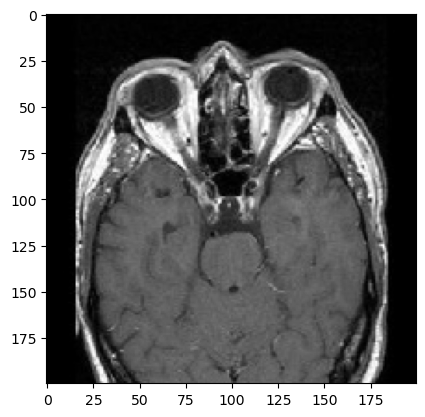

In [9]:
plt.imshow(X[0], cmap='gray')


In [10]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [13]:
from sklearn.decomposition import PCA


In [14]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [16]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [17]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [18]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9591836734693877


In [19]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9938587512794268
Testing Score: 0.963265306122449


In [20]:
pred = sv.predict(xtest)


In [21]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [22]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  9
0 1


In [23]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

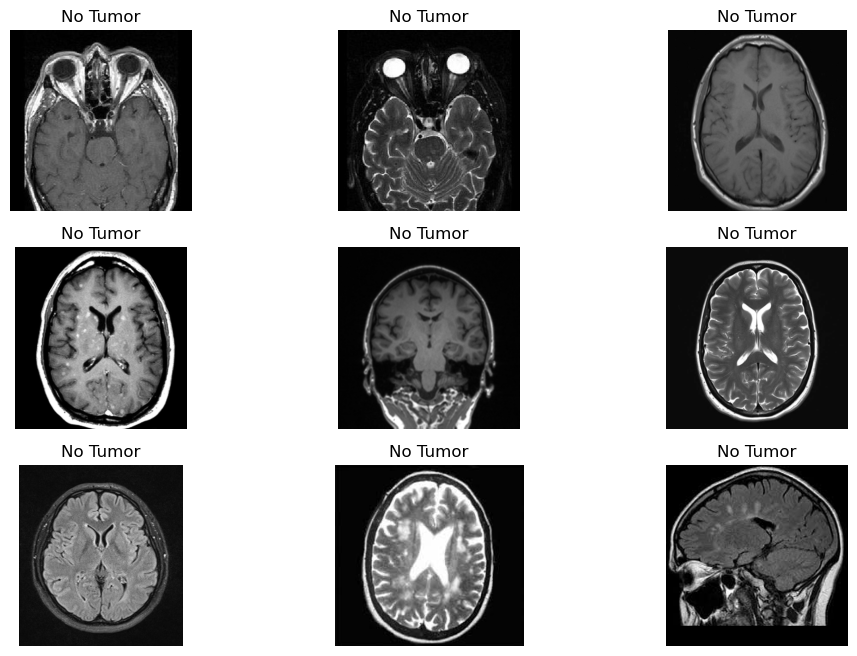

In [24]:
plt.figure(figsize=(12,8))
p = os.listdir('C:\\Users\\Ranjith\\Documents\\Brain-Tumor-Classification-DataSet-master\\Brain-Tumor-Classification-DataSet-master\\Training')
c=1
for i in os.listdir('C:\\Users\\Ranjith\\Documents\\Brain-Tumor-Classification-DataSet-master\\Brain-Tumor-Classification-DataSet-master\\Training\\no_tumor\\')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('C:\\Users\\Ranjith\\Documents\\Brain-Tumor-Classification-DataSet-master\\Brain-Tumor-Classification-DataSet-master\\Training\\no_tumor\\'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

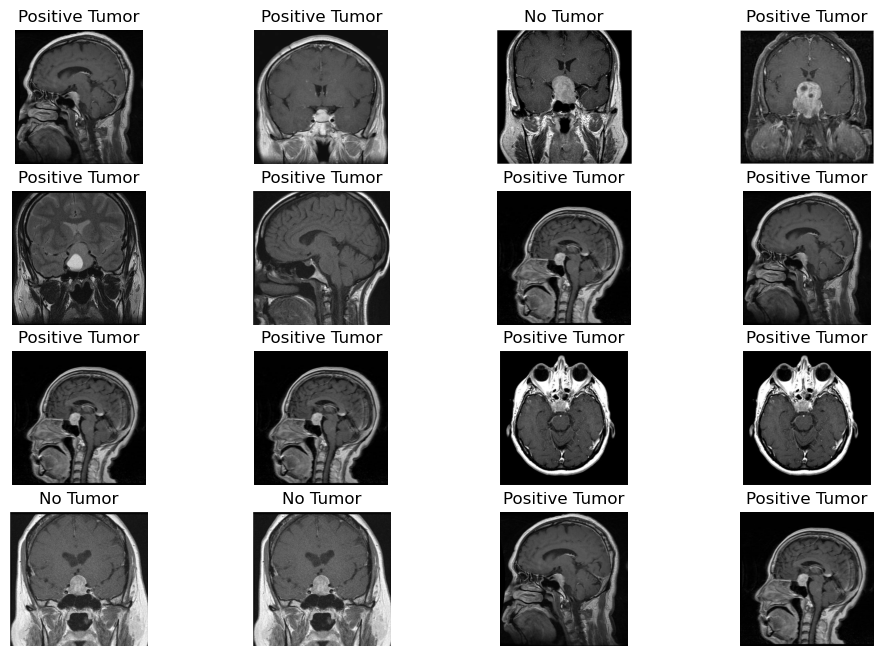

In [25]:
plt.figure(figsize=(12,8))
p = os.listdir('C:\\Users\\Ranjith\\Documents\\Brain-Tumor-Classification-DataSet-master\\Brain-Tumor-Classification-DataSet-master\\Testing\\')
c=1
for i in os.listdir('C:\\Users\\Ranjith\\Documents\\Brain-Tumor-Classification-DataSet-master\\Brain-Tumor-Classification-DataSet-master\\Testing\\pituitary_tumor\\')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('C:\\Users\\Ranjith\\Documents\\Brain-Tumor-Classification-DataSet-master\\Brain-Tumor-Classification-DataSet-master\\Testing\\pituitary_tumor\\'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1